<a href="https://colab.research.google.com/github/vedakshay/Cardio-Vascular-Disease-Prediction/blob/main/Cardio_Vascular_Disease(CMPE_257_lab_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/lab1_dataset/cardio-train.csv',delimiter=';')
train_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,92150,20535.0,NaN,163.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,0
1,88880,16125.0,Men,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,10483,19761.0,NaN,170.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,1
3,22798,19035.0,Men,NaN,89.0,NaN,80.0,Normal,NaN,0.0,NaN,NaN,0
4,85542,NaN,NaN,158.0,74.0,NaN,93.0,High,NaN,0.0,1.0,1.0,1


## 1. Identify the dataset columns into nominal, categorical, continues etc. categories

In [ ]:
# id, age, height, weight, ap_hi, ap_lo are continues variables
# smoke, alco, active, cardio, gender, cholesterol are catogorical/nominal variables

## 2. Use dataframe.info and dataframe.describe to get the insights about the data.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   age          335 non-null    float64
 2   gender       329 non-null    object 
 3   height       198 non-null    float64
 4   weight       336 non-null    float64
 5   ap_hi        347 non-null    float64
 6   ap_lo        332 non-null    float64
 7   cholesterol  333 non-null    object 
 8   gluc         333 non-null    object 
 9   smoke        326 non-null    float64
 10  alco         335 non-null    float64
 11  active       343 non-null    float64
 12  cardio       500 non-null    int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 50.9+ KB


In [ ]:
train_df.describe()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,500.000000,335.000000,198.000000,336.000000,347.000000,332.000000,326.000000,335.000000,343.000000,500.000000
mean,50279.916000,19490.886567,163.934343,74.347321,128.685879,90.060241,0.092025,0.065672,0.813411,0.502000
std,29913.623631,2466.702487,8.258559,14.335964,18.490176,87.396945,0.289505,0.248078,0.390150,0.500497
min,38.000000,14334.000000,120.000000,45.000000,12.000000,60.000000,0.000000,0.000000,0.000000,0.000000
25%,23446.500000,17988.500000,159.250000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,51913.500000,19719.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,1.000000
75%,78656.000000,21597.500000,168.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99662.000000,23479.000000,187.000000,155.000000,190.000000,1000.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
 #There are a total of 13 attributes where one of the attribute 'cardio' is the target and 500 records. There are few missing values in the dataset which were having 'NaN'.
# there are outliers in the ap_hi and ap_low

# 2.1 feature engineering

In [ ]:
#  converting age from days to years
train_df['age'] =  train_df['age'] / 365
train_df = train_df.drop('id', axis=1) # droping 'id' column as it is less significant in prediction
train_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.260274,NaN,163.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,0
1,44.178082,Men,168.0,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,54.139726,NaN,170.0,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,1
3,52.150685,Men,NaN,89.0,NaN,80.0,Normal,NaN,0.0,NaN,NaN,0
4,NaN,NaN,158.0,74.0,NaN,93.0,High,NaN,0.0,1.0,1.0,1


##3. Find the number of null values for each columns


In [ ]:
train_df.isnull().sum()

age            165
gender         171
height         302
weight         164
ap_hi          153
ap_lo          168
cholesterol    167
gluc           167
smoke          174
alco           165
active         157
cardio           0
dtype: int64

## 4. Know about the patients (Example of analysis for ages)

### a. Find the oldest person



In [ ]:
print('Age of Oldest Person:', train_df['age'].max())

Age of Oldest Person: 64.32602739726028


### b. Find the youngest person

In [ ]:
print('Youngest person age: ',round(train_df['age'].min()))

Youngest person age:  39


### c. Find the average age group

In [ ]:
print('Average age: ',round(train_df['age'].mean()))

Average age:  53


### d. Find median age

In [ ]:
print('Median age: ',round(train_df['age'].median()))

Median age:  54


### e. Find the relationship between the cardio and ages(the cardio column is your prediction variable)

In [ ]:
# plot between cardio and age.
carage_df = train_df[['cardio','age']]
carage_df.head()

,cardio,age
0,0,56.260274
1,0,44.178082
2,1,54.139726
3,0,52.150685
4,1,NaN


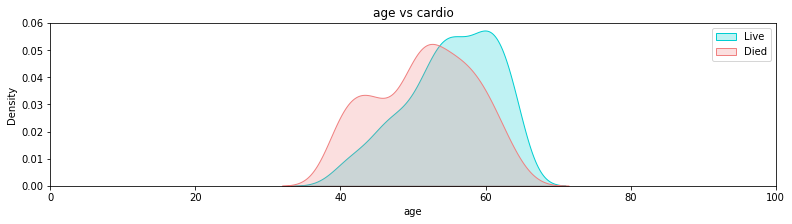

In [ ]:
  plt.figure(figsize=(13,3))
sns.kdeplot(carage_df.age[carage_df.cardio == 1], color ='darkturquoise', shade= True)
sns.kdeplot(carage_df.age[carage_df.cardio == 0], color ='lightcoral', shade= True)
plt.legend(['Live','Died'])
plt.title('age vs cardio')
plt.xlim(0,100)
plt.show()

In [ ]:
# having 'age' more than 60 have high probability of survival, while the age between 55 to 58 are more prone to cardio risk.

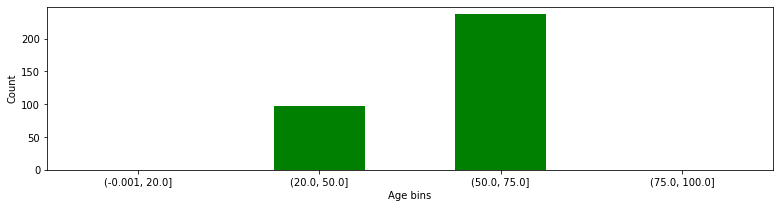

In [ ]:
bins = [0, 20, 50, 75, 100]
out = pd.cut(carage_df.age, bins = bins, include_lowest= True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color = 'g', figsize=(13,3))
plt.xlabel('Age bins')
plt.ylabel('Count')
plt.show()

In [ ]:
# the dataset has more records of people having age between 50 to 75 which is more than 250
# while the other 100 records are people with ages between 20 to 50

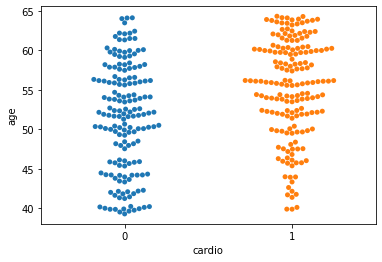

In [ ]:
import seaborn as sns
sns.swarmplot(x='cardio', y="age", data=carage_df)

In [ ]:
# with the age the number of cardio cases are getting increased till the peak and getting decreased as it increases.

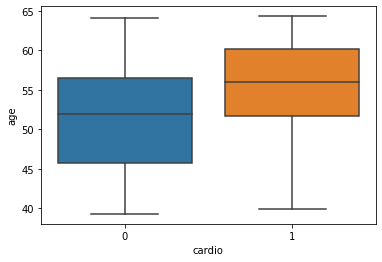

In [ ]:
sns.boxplot(x="cardio", y="age", data=carage_df)

In [ ]:

# the median age for people having cardio is '56' while the median age for people not having cardio is '52'

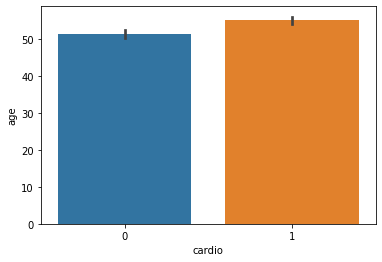

In [ ]:
sns.barplot(x="cardio", y="age", data=carage_df)

In [ ]:
# the 'age' attribute for the dataset is balanced having near to equal cardio and non-cardio cases

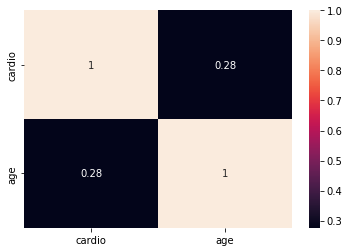

In [ ]:
sns.heatmap(carage_df.corr(), annot = True)

In [ ]:
# The correlation between age and cardio is 0.28. Age is positivly correlated with cardio results. Thus making 'age' one of the prominent feature in prediction of cardio

### f. Find the age groups whose survival rate is the largest


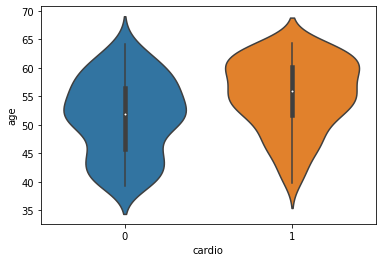

In [ ]:
sns.violinplot(x='cardio', y='age',data=carage_df )

In [ ]:
# from the above voilin plot we can see people with age between (50 to 55) have high survival rate.

### g. Find similar relationships for at least 3-4 columns that you think can play a role in prediction (For example, systolic BP, cholesterol etc.)

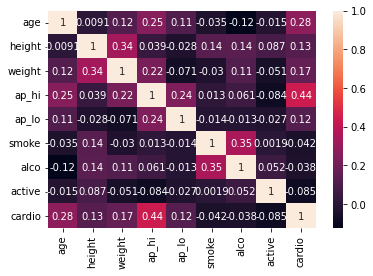

In [ ]:
import seaborn as sns
sns.heatmap(train_df.corr(), annot = True)

In [ ]:
##From the above plot ap_hi, age, height, weight attributes has high correlation with the target class(ie cardio)

#### 1. ap_hi

In [ ]:
train_df.ap_hi.describe()

count    347.000000
mean     128.685879
std       18.490176
min       12.000000
25%      120.000000
50%      120.000000
75%      140.000000
max      190.000000
Name: ap_hi, dtype: float64

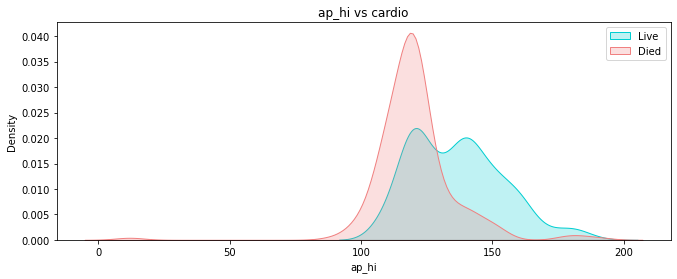

In [ ]:
plt.figure(figsize=(11,4))
sns.kdeplot(train_df.ap_hi[train_df.cardio == 1], color ='darkturquoise', shade= True)
sns.kdeplot(train_df.ap_hi[train_df.cardio == 0], color ='lightcoral', shade= True)
plt.legend(['Live','Died'])
plt.title('ap_hi vs cardio')
plt.show()

In [ ]:
# people with ap_hi near 120 have high chances of death rate.
# people with range 120 to 150 have good servival rate

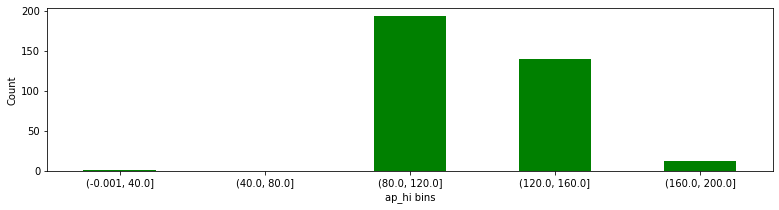

In [ ]:
bins = [0, 40, 80, 120, 160, 200]
out = pd.cut(train_df.ap_hi, bins = bins, include_lowest= True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color = 'g', figsize=(13,3))
plt.xlabel('ap_hi bins')
plt.ylabel('Count')
plt.show()

In [ ]:
# there are more than 190 records between range 80 - 120 
# and more than 140 records between 120 - 160

#### 2. ap_lo

In [ ]:
train_df.ap_lo.describe()

count     332.000000
mean       90.060241
std        87.396945
min        60.000000
25%        80.000000
50%        80.000000
75%        90.000000
max      1000.000000
Name: ap_lo, dtype: float64

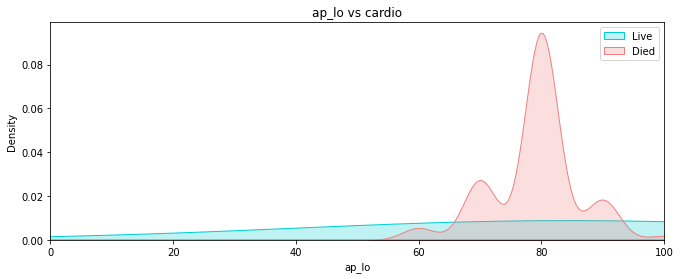

In [ ]:
plt.figure(figsize=(11,4))
sns.kdeplot(train_df.ap_lo[train_df.cardio == 1], color ='darkturquoise', shade= True)
sns.kdeplot(train_df.ap_lo[train_df.cardio == 0], color ='lightcoral', shade= True)
plt.legend(['Live','Died'])
plt.title('ap_lo vs cardio')
plt.xlim(0,100)
plt.show()

In [ ]:
# There are high chances of death for the people having ap_lo '80'
# Rest of the people with ap_lo values have good chances of survival

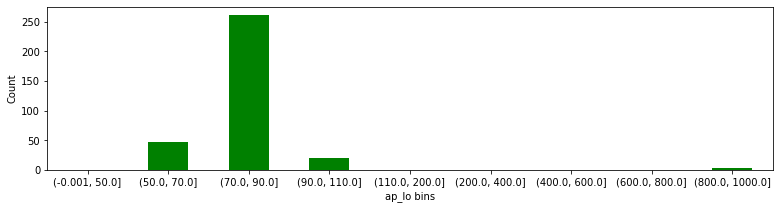

In [ ]:
bins = [0, 50,70,90,110,200, 400, 600, 800,1000]
out = pd.cut(train_df.ap_lo, bins = bins, include_lowest= True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color = 'g', figsize=(13,3))
plt.xlabel('ap_lo bins')
plt.ylabel('Count')
plt.show()

In [ ]:
# few outliers are present in ap_lo having range 800 to 1000
# most of the ap_lo is between range 70 to 90

#### 3. Weight

In [ ]:
train_df.weight.describe()

count    336.000000
mean      74.347321
std       14.335964
min       45.000000
25%       65.000000
50%       72.000000
75%       82.000000
max      155.000000
Name: weight, dtype: float64

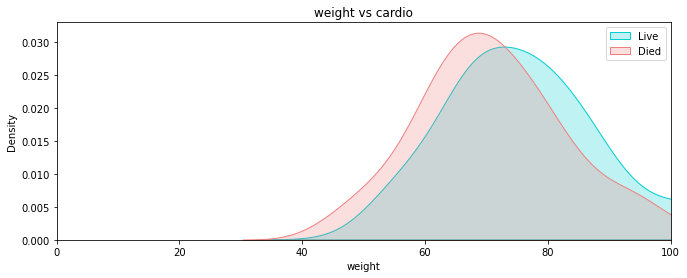

In [ ]:
plt.figure(figsize=(11,4))
sns.kdeplot(train_df.weight[train_df.cardio == 1], color ='darkturquoise', shade= True)
sns.kdeplot(train_df.weight[train_df.cardio == 0], color ='lightcoral', shade= True)
plt.legend(['Live','Died'])
plt.title('weight vs cardio')
plt.xlim(0,100)
plt.show()

In [ ]:
# people between age 70 - 80 have high chances of survival
# people between age 60 - 70 have high chances of death

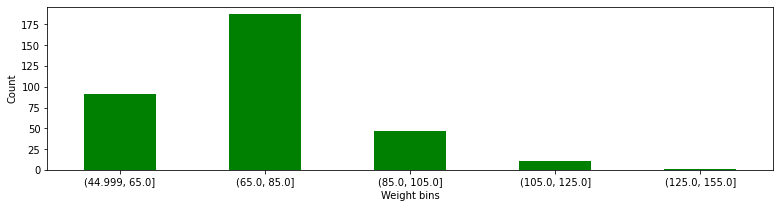

In [ ]:
bins = [45, 65, 85, 105, 125,155]
out = pd.cut(train_df.weight, bins = bins, include_lowest= True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color = 'g', figsize=(13,3))
plt.xlabel('Weight bins')
plt.ylabel('Count')
plt.show()

In [ ]:
# most of the people are having weights between 65 to 85

### h. Get more visuals on data distributions

#### i. Use plot CorrelationMatrix

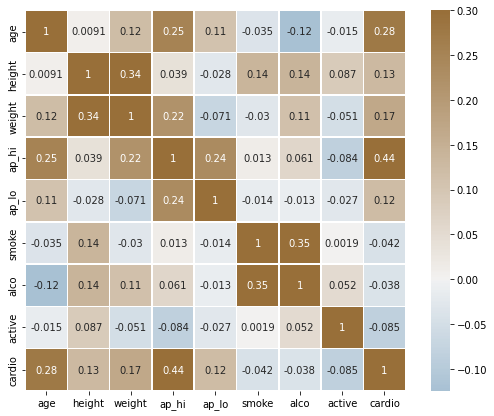

In [ ]:
import matplotlib.pyplot as plt
corr = train_df.corr()
cmap = sns.diverging_palette(240, 50, as_cmap=True)
f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,annot = True, square=True, linewidths=.5);

In [ ]:
# From the above plot ap_hi and age have high correlation with cardio

#### ii. plot ScatterMatrix


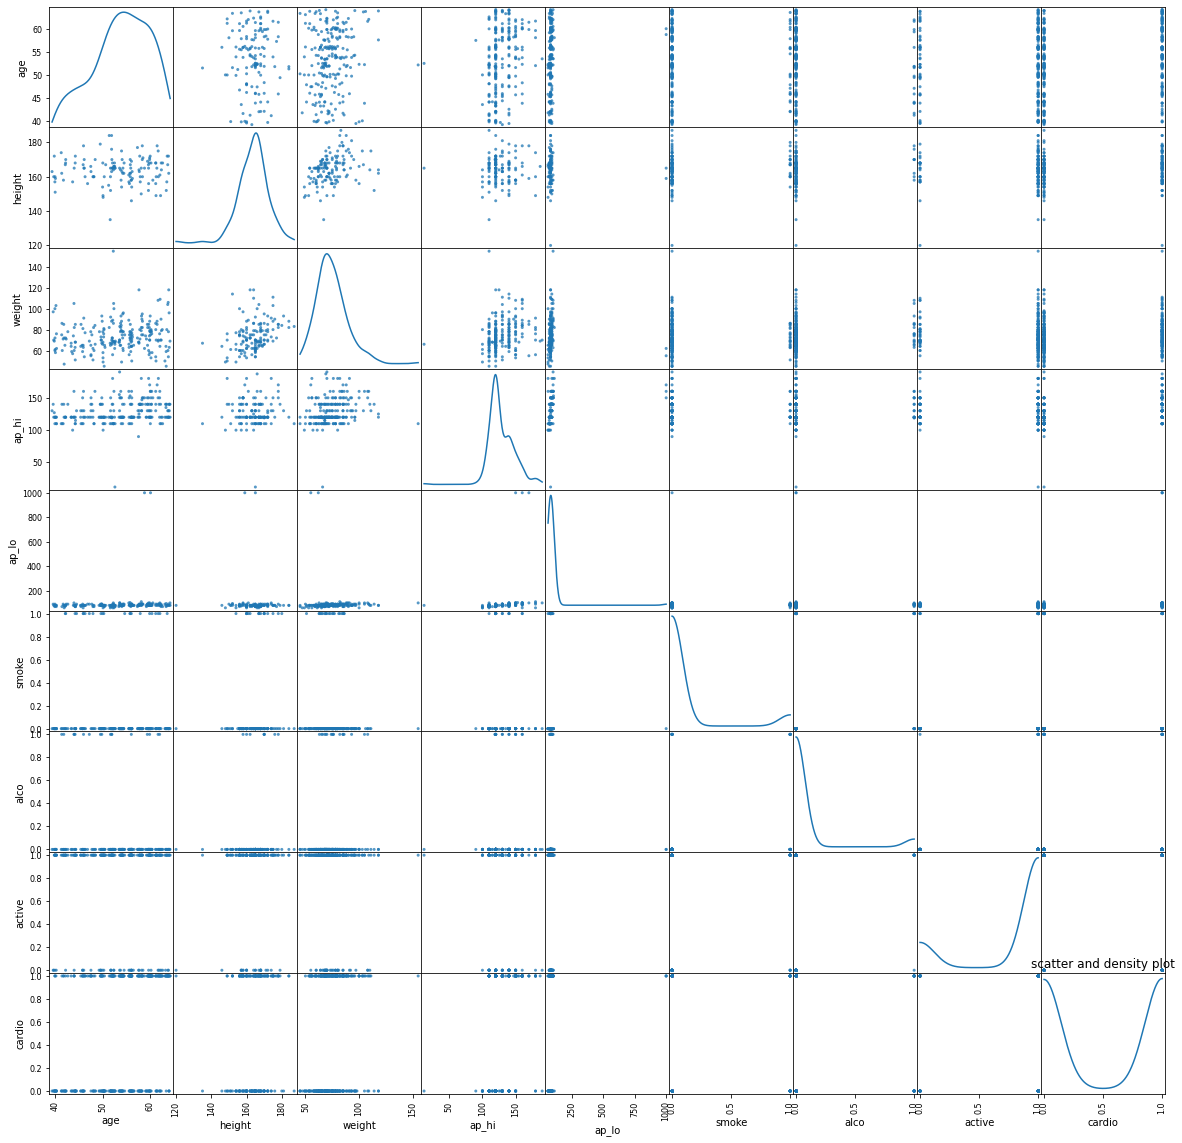

In [ ]:
ax = pd.plotting.scatter_matrix(train_df, alpha=0.75, figsize=[20, 20], diagonal='kde')
plt.title('scatter and density plot')
plt.show()

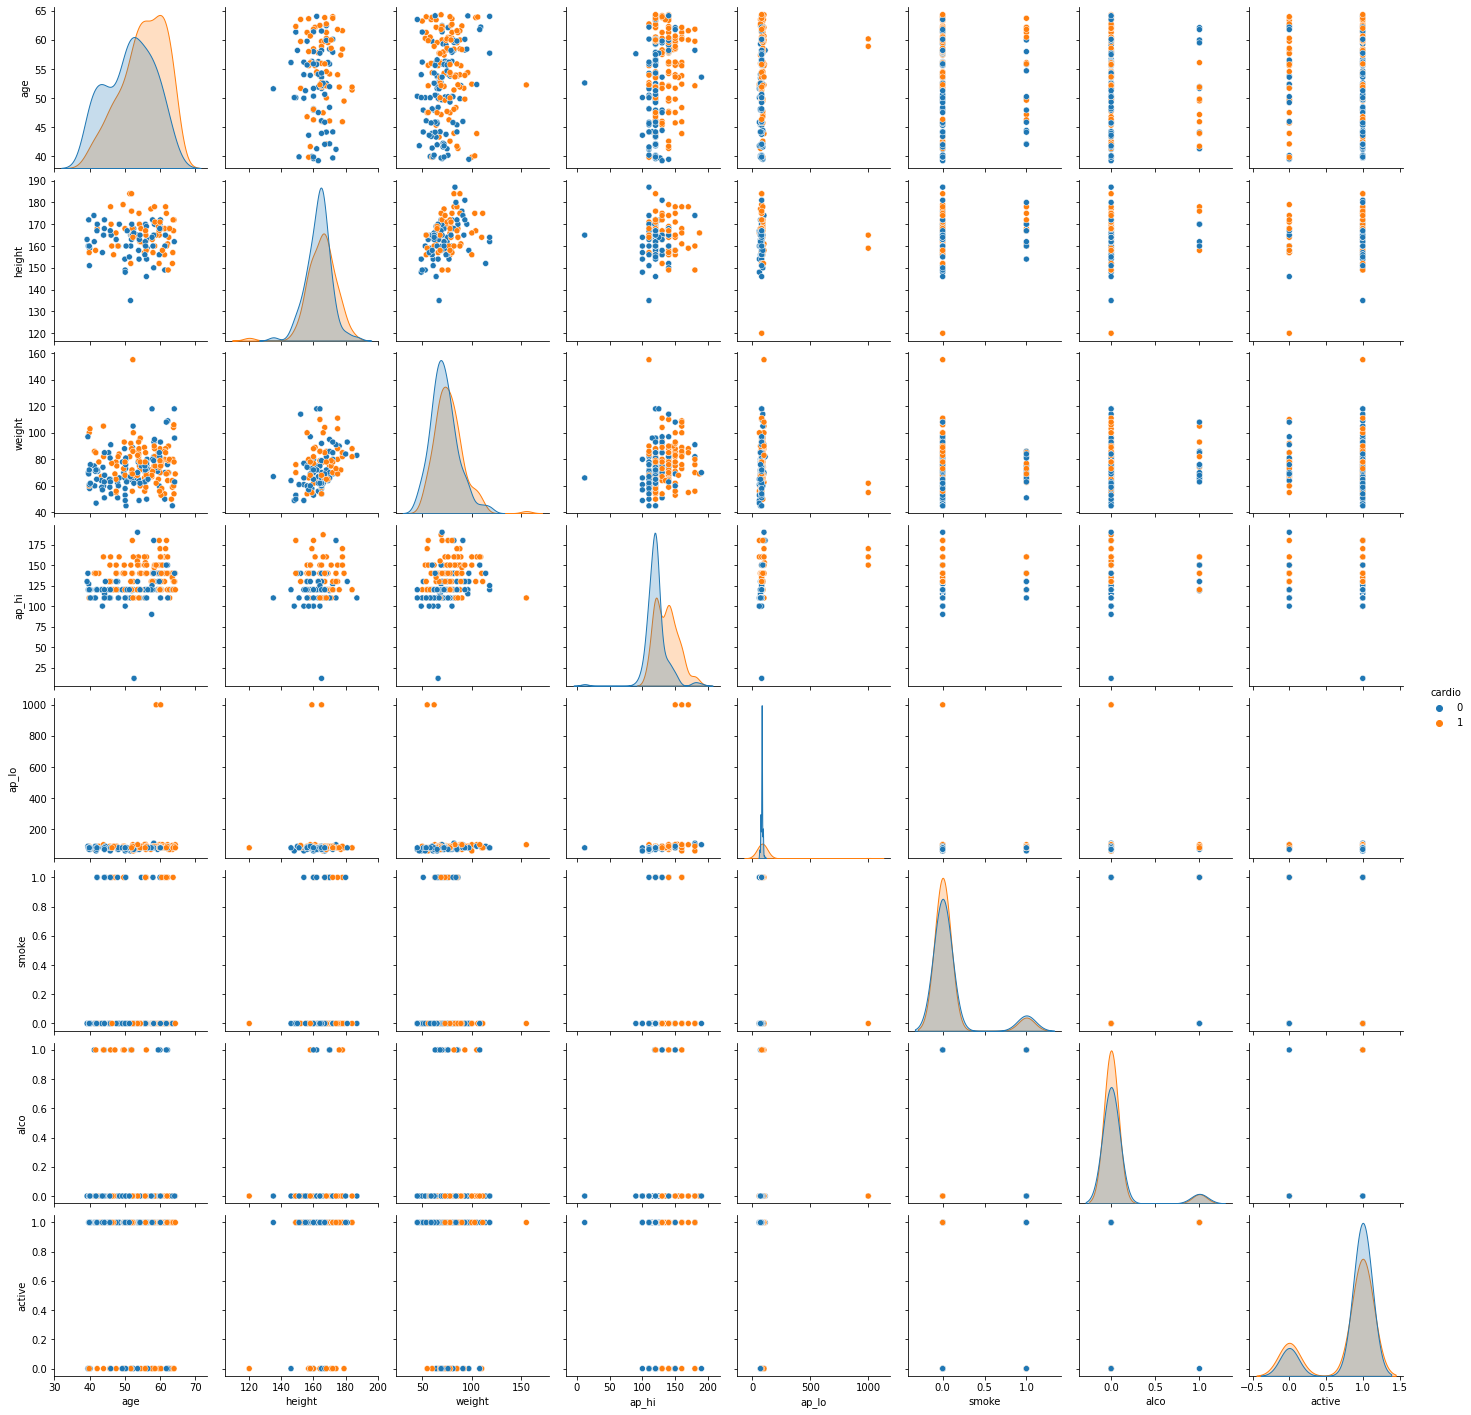

In [ ]:
sns.pairplot(train_df,hue='cardio')

In [ ]:
# using the plot between age and ap_hi the cardio could be predicted as it is somewhat seperable and not overlapping.
# same for plot between height and ap_hi, weight and ap_hi 

#### iii. plotPerColumnDistribution (Use information from the plots to get an intuition for selecting feature variables)


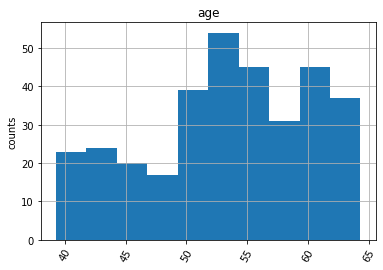

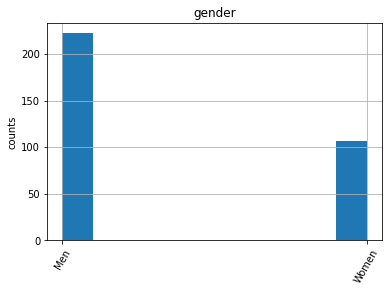

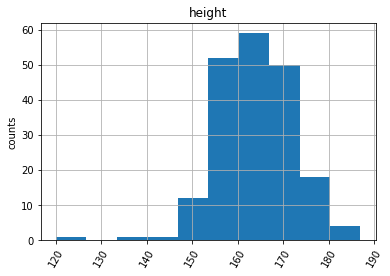

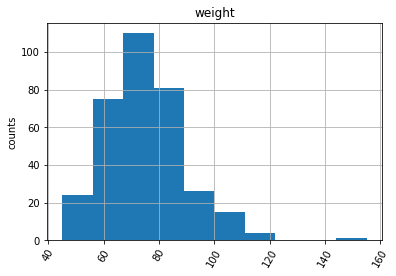

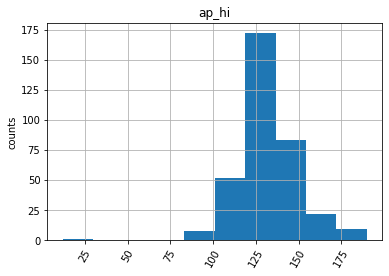

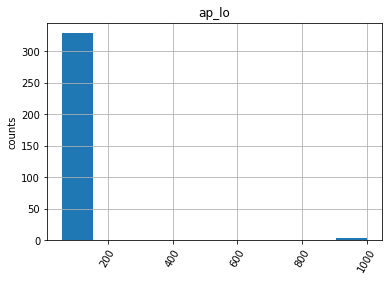

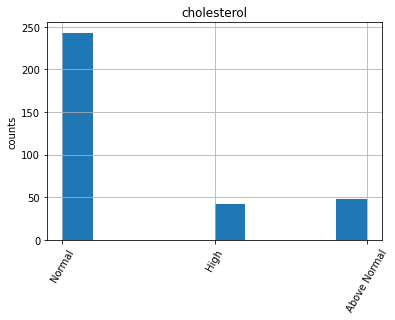

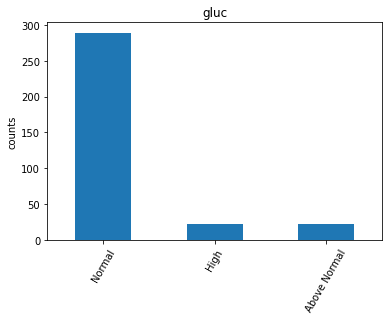

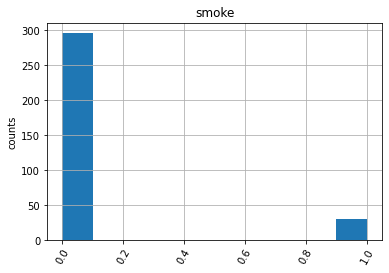

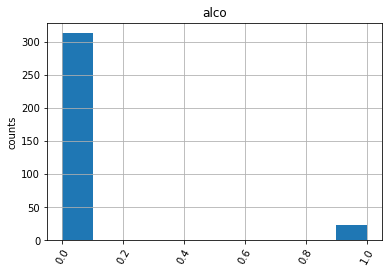

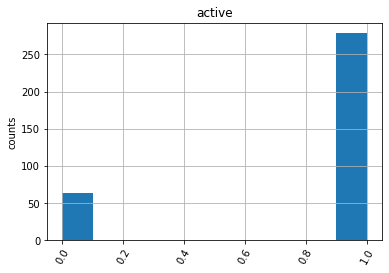

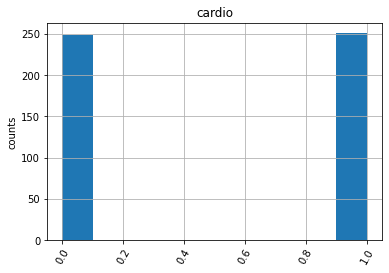

In [ ]:
features = list(train_df.columns)

for i in range(len(train_df.columns)):
    plt.figure()
    sub_df = train_df.iloc[:,i]
    if (not np.issubdtype(type(sub_df.iloc[0]), np.number)):
        valueCounts = sub_df.value_counts()
        valueCounts.plot.bar()
    else:
        sub_df.hist()
    plt.ylabel('counts')
    plt.xticks(rotation = 60)
    plt.title(features[i])
    plt.show()

In [ ]:
# the dataset is imbalanced towards the feature cholesterol and gender
# there are few outliers in ap_lo as it low blood preasure is impossible to have value 1000

### Remove Outliers and replace with median

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


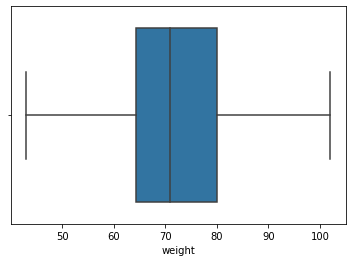

In [ ]:
sns.boxplot(final_df['weight'])

In [ ]:
columns = ['weight', 'ap_lo', 'ap_hi']
for col in columns:
  Q1 = train_df[col].quantile(0.25)
  Q3 = train_df[col].quantile(0.75)
  IQR = Q3 - Q1    #IQR is interquartile range. 
  med = np.median(train_df[col])
  for i in train_df[col]:
    if (i <= Q1 - 1.5 * IQR) or (i >= Q3 + 1.5 *IQR):
      train_df[col] = train_df[col].replace(i, med)

## i. Find missing values

#### i. Get the count of missing values


In [ ]:
train_df.isnull().sum()

age            165
gender         171
height         302
weight         174
ap_hi          167
ap_lo          180
cholesterol    167
gluc           167
smoke          174
alco           165
active         157
cardio           0
dtype: int64

#### ii. Plot a heat map for missing values

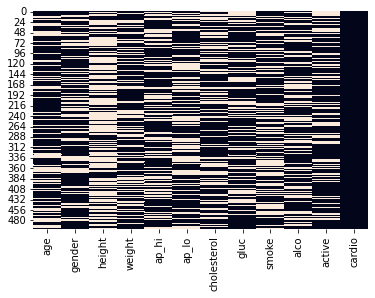

In [ ]:
sns.heatmap(train_df.isnull(), cbar=False)

In [ ]:
# 'height' could be dropped as more values of the height are missing
train_df = train_df.drop('height',axis=1)

In [ ]:
train_df.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.260274,NaN,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,0
1,44.178082,Men,68.0,110.0,70.0,NaN,NaN,0.0,0.0,NaN,0
2,54.139726,NaN,75.0,120.0,NaN,NaN,Normal,0.0,0.0,1.0,1
3,52.150685,Men,89.0,NaN,80.0,Normal,NaN,0.0,NaN,NaN,0
4,NaN,NaN,74.0,NaN,93.0,High,NaN,0.0,1.0,1.0,1


### j. Applying a different technique to handle missing values (For each technique verify your prediction results)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in ['gender','cholesterol','gluc', 'active']:
    train_df[feat] = le.fit_transform(train_df[feat].astype(str))
train_df.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.260274,2,75.0,120.0,NaN,3,2,0.0,0.0,1,0
1,44.178082,0,68.0,110.0,70.0,3,3,0.0,0.0,2,0
2,54.139726,2,75.0,120.0,NaN,3,2,0.0,0.0,1,1
3,52.150685,0,89.0,NaN,80.0,2,3,0.0,NaN,2,0
4,NaN,2,74.0,NaN,93.0,1,3,0.0,1.0,1,1


In [ ]:
# # First filling missing categorical variables(gender,cholesterol, gluc) with mode and appling label encoding so we can move to numerical variables
# for feature in ['gender','cholesterol','gluc','smoke','alco','active']:
#     train_df[feature].fillna(train_df[feature].mode()[0], inplace=True)
# train_df.head()
#First filling missing categorical variables(gender,cholesterol, gluc) with mode and appling label encoding so we can move to numerical variables
for feature in ['cholesterol','gender','gluc','smoke','alco']:
    train_df[feature].fillna(train_df[feature].mode()[0], inplace=True)
# for feature in ['gender','cholesterol','gluc','smoke','alco', 'active']:
#     train_df[feature].fillna(method="bfill", inplace=True)
# train_df.head()

#### i. Use dropna

In [ ]:
train_df_drop = train_df.dropna(axis = 0, how= 'any')
print(train_df_drop.shape)
train_df_drop.head()

(84, 11)


,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,44.178082,0,68.0,110.0,70.0,3,3,0.0,0.0,2,0
11,64.295890,0,69.0,140.0,100.0,2,3,0.0,0.0,2,1
20,57.720548,0,67.0,140.0,90.0,2,2,0.0,0.0,0,1
22,59.484932,2,85.0,150.0,80.0,3,2,0.0,0.0,1,1
25,47.180822,1,69.0,120.0,90.0,3,3,1.0,1.0,2,1


In [ ]:
# by using this technique we are only left with 84 records which is inefficient for training.

#### ii. Use replace NA with zero or max value

In [ ]:
# zero value imputation
train_df_0 = train_df.fillna(0)
train_df_0.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.260274,2,75.0,120.0,0.0,3,2,0.0,0.0,1,0
1,44.178082,0,68.0,110.0,70.0,3,3,0.0,0.0,2,0
2,54.139726,2,75.0,120.0,0.0,3,2,0.0,0.0,1,1
3,52.150685,0,89.0,0.0,80.0,2,3,0.0,0.0,2,0
4,0.000000,2,74.0,0.0,93.0,1,3,0.0,1.0,1,1


In [ ]:
train_df.shape

(500, 11)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(train_df_0.drop('cardio',axis=1), train_df_0['cardio'], test_size = 0.15, random_state=149)
log_reg_0 = LogisticRegression(C = 10, penalty='l1', solver='liblinear')
log_reg_0.fit(X_train_0, y_train_0)
print('f1_score: ',round(f1_score(y_test_0,  log_reg_0.predict(X_test_0)), 3))

f1_score:  0.479


In [ ]:
# max value impuation
train_df_max = train_df.fillna(train_df.max())
train_df_max.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.260274,2,75.0,120.0,103.0,3,2,0.0,0.0,1,0
1,44.178082,0,68.0,110.0,70.0,3,3,0.0,0.0,2,0
2,54.139726,2,75.0,120.0,103.0,3,2,0.0,0.0,1,1
3,52.150685,0,89.0,160.0,80.0,2,3,0.0,0.0,2,0
4,64.326027,2,74.0,160.0,93.0,1,3,0.0,1.0,1,1


In [ ]:
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(train_df_max.drop('cardio',axis=1), train_df_max['cardio'], test_size = 0.15, random_state=149)
log_reg_max = LogisticRegression(C = 10, penalty='l1', solver='liblinear')
log_reg_max.fit(X_train_max, y_train_max)
print('f1_score: ',round(f1_score(y_test_max,  log_reg_0.predict(X_test_max)), 3))

f1_score:  0.686


#### iii. Use replace NA with mean


In [ ]:
train_df_mean = train_df.fillna(train_df.mean())
train_df_mean.head()

# train_df['age'] = train_df['age'].fillna(train_df.mean())
# train_df['height'] = train_df['height'].fillna(train_df.mean())
# train_df.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.260274,2,75.0,120.000000,82.21875,3,2,0.0,0.0,1,0
1,44.178082,0,68.0,110.000000,70.00000,3,3,0.0,0.0,2,0
2,54.139726,2,75.0,120.000000,82.21875,3,2,0.0,0.0,1,1
3,52.150685,0,89.0,127.342342,80.00000,2,3,0.0,0.0,2,0
4,53.399689,2,74.0,127.342342,93.00000,1,3,0.0,1.0,1,1


#### iv. Search for additional techniques to handle null values, excluding the above three and test. (Include all the techniques that you used in your report.)

In [ ]:
# applying knn for imputing missing values

In [ ]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors = 4)
knn_imputer.fit(train_df)
num_cols = [col for col in train_df.columns if train_df[col].dtypes != 'O']
train_df_knn = pd.DataFrame(knn_imputer.transform(train_df),columns = num_cols)
train_df_knn.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,56.260274,2.0,75.0,120.0,82.5,3.0,2.0,0.0,0.0,1.0,0.0
1,44.178082,0.0,68.0,110.0,70.0,3.0,3.0,0.0,0.0,2.0,0.0
2,54.139726,2.0,75.0,120.0,80.0,3.0,2.0,0.0,0.0,1.0,1.0
3,52.150685,0.0,89.0,115.0,80.0,2.0,3.0,0.0,0.0,2.0,0.0
4,53.506849,2.0,74.0,127.5,93.0,1.0,3.0,0.0,1.0,1.0,1.0


In [ ]:
# feature_engineering using domain knowledge
# Adding the new column pulse pressure
train_df_knn['pulse pressure'] = train_df_knn['ap_hi'] - train_df_knn['ap_lo']
train_df_mean['pulse pressure'] = train_df_mean['ap_hi'] - train_df_mean['ap_lo']

In [ ]:
train_df_knn.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pulse pressure
0,56.260274,2.0,75.0,120.0,82.5,3.0,2.0,0.0,0.0,1.0,0.0,37.5
1,44.178082,0.0,68.0,110.0,70.0,3.0,3.0,0.0,0.0,2.0,0.0,40.0
2,54.139726,2.0,75.0,120.0,80.0,3.0,2.0,0.0,0.0,1.0,1.0,40.0
3,52.150685,0.0,89.0,115.0,80.0,2.0,3.0,0.0,0.0,2.0,0.0,35.0
4,53.506849,2.0,74.0,127.5,93.0,1.0,3.0,0.0,1.0,1.0,1.0,34.5


In [ ]:
final_df_mean.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,pulse pressure
0,56.260274,2,75.0,120.000000,90.060241,3,2,0.0,0.0,0,29.939759
1,44.178082,0,68.0,110.000000,70.000000,3,3,0.0,0.0,0,40.000000
2,54.139726,2,75.0,120.000000,90.060241,3,2,0.0,0.0,1,29.939759
3,52.150685,0,89.0,128.685879,80.000000,2,3,0.0,0.0,0,48.685879
4,19490.886567,2,74.0,128.685879,93.000000,1,3,0.0,1.0,1,35.685879


### k. Applying the feature scaling technique if you think it is required. (Optional)


In [ ]:
train_df_knn.describe()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pulse pressure
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,53.443795,0.898000,73.338900,126.876000,81.890500,2.058000,2.202000,0.060000,0.044000,1.186000,0.502000,44.985500
std,5.952932,0.881561,10.845354,13.037334,6.264013,0.894559,0.717094,0.237725,0.205301,0.638921,0.500497,10.601117
min,39.271233,0.000000,45.000000,100.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,49.982877,0.000000,66.937500,120.000000,80.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,40.000000
50%,53.875342,1.000000,72.125000,120.000000,80.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,42.500000
75%,57.916781,2.000000,80.000000,135.000000,85.000000,3.000000,3.000000,0.000000,0.000000,2.000000,1.000000,50.000000
max,64.326027,2.000000,106.000000,160.000000,103.000000,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,80.000000


In [ ]:
# min max scaler on mean imputation

from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['age','ap_hi','ap_lo','weight','pulse pressure']
X_train_means = train_df_mean.drop('cardio',axis=1)
y_train_means = train_df_mean['cardio']
X_train_means[numerical_columns] = MinMaxScaler().fit_transform(X_train_means[numerical_columns])
X_train_means.head()
X_train_means.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,pulse pressure
0,0.678075,2,0.491803,0.333333,0.370265,3,2,0.0,0.0,1,0.396875
1,0.195845,0,0.377049,0.166667,0.000000,3,3,0.0,0.0,2,0.428571
2,0.593439,2,0.491803,0.333333,0.370265,3,2,0.0,0.0,1,0.396875
3,0.514051,0,0.721311,0.455706,0.303030,2,3,0.0,0.0,2,0.533462
4,0.563902,2,0.475410,0.455706,0.696970,1,3,0.0,1.0,1,0.347748


In [ ]:
train_df_knn.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pulse pressure
0,56.260274,2.0,75.0,120.0,82.5,3.0,2.0,0.0,0.0,1.0,0.0,37.5
1,44.178082,0.0,68.0,110.0,70.0,3.0,3.0,0.0,0.0,2.0,0.0,40.0
2,54.139726,2.0,75.0,120.0,80.0,3.0,2.0,0.0,0.0,1.0,1.0,40.0
3,52.150685,0.0,89.0,115.0,80.0,2.0,3.0,0.0,0.0,2.0,0.0,35.0
4,53.506849,2.0,74.0,127.5,93.0,1.0,3.0,0.0,1.0,1.0,1.0,34.5


In [ ]:
y_train_means.shape

(500,)

In [ ]:
y_train_knns.shape

(500,)

In [ ]:
X_train_knns.describe()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,pulse pressure,cardio
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.565663,0.898000,0.464572,0.447933,0.360318,2.058000,2.202000,0.060000,0.044000,1.186000,0.499793,0.502000
std,0.237597,0.881561,0.177793,0.217289,0.189819,0.894559,0.717094,0.237725,0.205301,0.638921,0.151445,0.500497
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.427529,0.000000,0.359631,0.333333,0.303030,2.000000,2.000000,0.000000,0.000000,1.000000,0.428571,0.000000
50%,0.582887,1.000000,0.444672,0.333333,0.303030,2.000000,2.000000,0.000000,0.000000,1.000000,0.464286,1.000000
75%,0.744191,2.000000,0.573770,0.583333,0.454545,3.000000,3.000000,0.000000,0.000000,2.000000,0.571429,1.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000


In [ ]:
# min max scaler on knn imputed dataset 

from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['age','ap_hi','ap_lo','weight','pulse pressure']
X_train_knns = train_df_knn.drop('cardio',axis=1)
y_train_knns = train_df_knn['cardio']
X_train_knns[numerical_columns] = MinMaxScaler().fit_transform(X_train_knns[numerical_columns])
X_train_knns.head()
X_train_knns.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,pulse pressure
0,0.678075,2.0,0.491803,0.333333,0.378788,3.0,2.0,0.0,0.0,1.0,0.392857
1,0.195845,0.0,0.377049,0.166667,0.000000,3.0,3.0,0.0,0.0,2.0,0.428571
2,0.593439,2.0,0.491803,0.333333,0.303030,3.0,2.0,0.0,0.0,1.0,0.428571
3,0.514051,0.0,0.721311,0.250000,0.303030,2.0,3.0,0.0,0.0,2.0,0.357143
4,0.568179,2.0,0.475410,0.458333,0.696970,1.0,3.0,0.0,1.0,1.0,0.350000


### l. Applying the regression models that you think is most suited for this problem.


# using train-test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_means, y_train_means, test_size = 0.15, random_state=149)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_knns, y_train_knns, test_size = 0.15, random_state=149)

In [ ]:
X_train.head(5)

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,pulse pressure
275,0.669328,2,0.377049,0.666667,0.370265,0,1,0.0,0.0,0,0.682589
285,0.532203,0,0.344262,0.455706,0.303030,2,3,0.0,0.0,1,0.533462
384,0.264516,0,0.295082,0.333333,0.303030,3,2,0.0,0.0,1,0.428571
342,0.195079,1,0.295082,0.455706,0.303030,3,2,1.0,1.0,2,0.533462
329,0.609951,2,0.460158,0.666667,0.606061,2,3,0.0,0.0,0,0.571429


####a) Lasso Logistic Regression


In [ ]:
# lasso logistic regression on mean_imputed dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, f1_score,precision_score, recall_score,confusion_matrix, accuracy_score

log_reg = LogisticRegression(C = 10, penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)
print('Accuracy: ',round(accuracy_score(y_test,  log_reg.predict(X_test)), 3))
print('precision: ',round(precision_score(y_test,  log_reg.predict(X_test)), 3))
print('recall: ',round(recall_score(y_test,  log_reg.predict(X_test)), 3))
print('f1_score: ',round(f1_score(y_test,  log_reg.predict(X_test)), 3))

Accuracy:  0.707
precision:  0.821
recall:  0.575
f1_score:  0.676


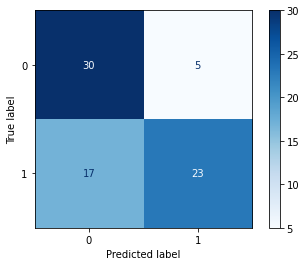

In [ ]:

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test, y_test, cmap=plt.cm.Blues)

### Got Accuracy of 73.6 with this model

In [ ]:
# lasso logistic regression on knn_imputed dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, f1_score
log_reg1 = LogisticRegression(C = 10, penalty='l1', solver='liblinear')
log_reg1.fit(X_train1, y_train1)
print('Accuracy: ',round(accuracy_score(y_test1,  log_reg1.predict(X_test1)), 3))
print('precision: ',round(precision_score(y_test1,  log_reg1.predict(X_test1)), 3))
print('recall: ',round(recall_score(y_test1,  log_reg1.predict(X_test1)), 3))
print('f1_score: ',round(f1_score(y_test1,  log_reg1.predict(X_test1)), 3))

Accuracy:  0.787
precision:  0.875
recall:  0.7
f1_score:  0.778


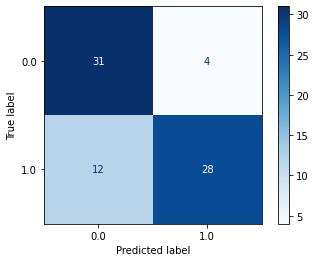

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg1, X_test1, y_test1, cmap=plt.cm.Blues)

####b) svm with RBF Kernal

In [ ]:
## svm with rbf kernal on mean_imputed dataset

from sklearn.metrics import accuracy_score

svm_rbf = SVC(kernel = 'rbf',C = 10, gamma = 0.05)
svm_rbf.fit(X_train1, y_train1)
#f1_score(y_test, svm_rbf.predict(X_test))
print('Accuracy: ',round(accuracy_score(y_test,  svm_rbf.predict(X_test)), 3))
print('precision: ',round(precision_score(y_test,  svm_rbf.predict(X_test)), 3))
print('recall: ',round(recall_score(y_test,  svm_rbf.predict(X_test)), 3))
print('f1_score: ',round(f1_score(y_test,  svm_rbf.predict(X_test)), 3))

Accuracy:  0.72
precision:  0.771
recall:  0.675
f1_score:  0.72


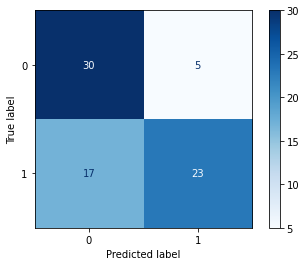

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test, y_test, cmap=plt.cm.Blues)

In [ ]:
## svm with rbf kernal on knn_imputed dataset

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, f1_score,precision_score, recall_score,confusion_matrix, accuracy_score

svm_rbf1 = SVC(kernel = 'rbf',C = 10, gamma =0.05)
svm_rbf1.fit(X_train1, y_train1)
# f1_score(y_test1, svm_rbf.predict(X_test1))
print('Accuracy: ',round(accuracy_score(y_test1,  svm_rbf1.predict(X_test1)), 3))
print('precision: ',round(precision_score(y_test1,  svm_rbf1.predict(X_test1)), 3))
print('recall: ',round(recall_score(y_test1,  svm_rbf1.predict(X_test1)), 3))
print('f1_score: ',round(f1_score(y_test1,  svm_rbf1.predict(X_test1)), 3))

Accuracy:  0.733
precision:  0.812
recall:  0.65
f1_score:  0.722


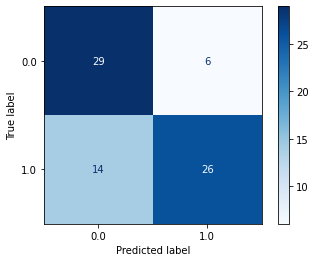

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_rbf1, X_test1, y_test1, cmap=plt.cm.Blues)

#### c. svm(rbf_kernal) with pca

In [ ]:
# on mean_imputed dataset
from sklearn.decomposition import PCA
from sklearn.svm import SVC

pca = PCA(n_components = 10)
pca.fit(X_train_means)
pca_mean = pca.transform(X_train_means)
X_trainp, X_testp, y_trainp, y_testp = train_test_split(pca_mean, y_train_means, test_size = 0.15, random_state=2)
trail1_svm = SVC(kernel = 'linear',C = 10, gamma = 0.05)
trail1_svm.fit(X_trainp, y_trainp)
# f1_score(y_testp, trail1_svm.predict(X_testp))
print('Accuracy: ',round(accuracy_score(y_testp,  trail1_svm.predict(X_testp)), 3))
print('precision: ',round(precision_score(y_testp,  trail1_svm.predict(X_testp)), 3))
print('recall: ',round(recall_score(y_testp,  trail1_svm.predict(X_testp)), 3))
print('f1_score: ',round(f1_score(y_testp,  trail1_svm.predict(X_testp)), 3))

Accuracy:  0.653
precision:  0.676
recall:  0.605
f1_score:  0.639


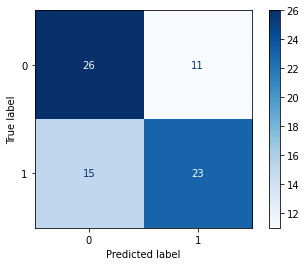

In [ ]:
plot_confusion_matrix(trail1_svm, X_testp, y_testp, cmap=plt.cm.Blues)

In [ ]:
X_train1.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,pulse pressure
275,0.669328,2.0,0.377049,0.666667,0.454545,0.0,1.0,0.0,0.0,0.0,0.642857
285,0.532203,0.0,0.344262,0.208333,0.303030,2.0,3.0,0.0,0.0,1.0,0.321429
384,0.264516,0.0,0.295082,0.333333,0.303030,3.0,2.0,0.0,0.0,1.0,0.428571
342,0.195079,1.0,0.295082,0.375000,0.303030,3.0,2.0,1.0,1.0,2.0,0.464286
329,0.609951,2.0,0.512295,0.666667,0.606061,2.0,3.0,0.0,0.0,0.0,0.571429


In [ ]:
# on knn_imputed dataset
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(X_train_knns)
pca_knn = pca.transform(X_train_knns)
X_trainp1, X_testp1, y_trainp1, y_testp1 = train_test_split(pca_knn, y_train_knns, test_size = 0.15, random_state=2)
trail2_svm = SVC(kernel = 'rbf',C = 1000, gamma = 0.1)
trail2_svm.fit(X_trainp1, y_trainp1)
# f1_score(y_testp1, trail2_svm.predict(X_testp))
print('Accuracy: ',round(accuracy_score(y_testp1,  trail2_svm.predict(X_testp1)), 3))
print('precision: ',round(precision_score(y_testp1,  trail2_svm.predict(X_testp1)), 3))
print('recall: ',round(recall_score(y_testp1,  trail2_svm.predict(X_testp1)), 3))
print('f1_score: ',round(f1_score(y_testp1,  trail2_svm.predict(X_testp1)), 3))

Accuracy:  0.72
precision:  0.758
recall:  0.658
f1_score:  0.704


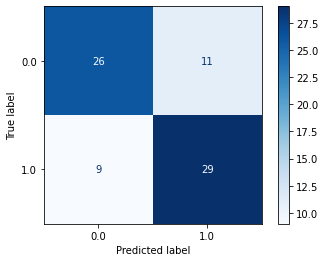

In [ ]:
plot_confusion_matrix(trail2_svm, X_testp1, y_testp1, cmap=plt.cm.Blues)

#### d. Decision tree


In [ ]:
# on mean_imputed dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

d_tree = DecisionTreeClassifier( max_leaf_nodes = 2)
d_tree.fit(X_train, y_train)
# print('Accuracy: ', f1_score(y_test, d_tree.predict(X_test)))
print('Accuracy: ',round(accuracy_score(y_test,  d_tree.predict(X_test)), 3))
print('precision: ',round(precision_score(y_test,  d_tree.predict(X_test)), 3))
print('recall: ',round(recall_score(y_test,  d_tree.predict(X_test)), 3))
print('f1_score: ',round(f1_score(y_test,  d_tree.predict(X_test)), 3))

Accuracy:  0.68
precision:  0.9
recall:  0.45
f1_score:  0.6


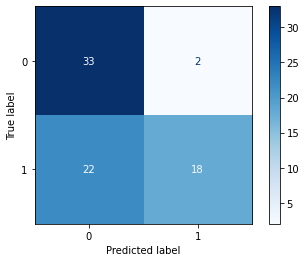

In [ ]:
plot_confusion_matrix(d_tree, X_test, y_test, cmap=plt.cm.Blues)

In [ ]:
# on knn_imputed dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

d_tree1 = DecisionTreeClassifier(max_leaf_nodes = 3)
d_tree1.fit(X_train1, y_train1)
# print('F1 score: ', f1_score(y_test1, d_tree1.predict(X_test1)))
print('Accuracy: ',round(accuracy_score(y_test1,  d_tree1.predict(X_test1)), 3))
print('precision: ',round(precision_score(y_test1,  d_tree1.predict(X_test1)), 3))
print('recall: ',round(recall_score(y_test1,  d_tree1.predict(X_test1)), 3))
print('f1_score: ',round(f1_score(y_test1,  d_tree1.predict(X_test1)), 3))

Accuracy:  0.76
precision:  0.806
recall:  0.725
f1_score:  0.763


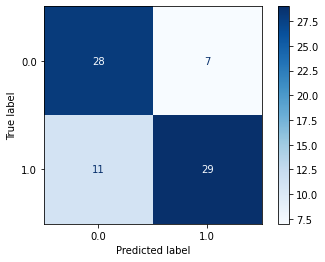

In [ ]:
plot_confusion_matrix(d_tree1, X_test1, y_test1, cmap=plt.cm.Blues)

####e)Random Forest

In [ ]:
# on mean-imputation
rfc = RandomForestClassifier(n_estimators=500, max_features= 7, max_depth=3,bootstrap=True)
rfc.fit(X_train, y_train)
print('Accuracy: ',round(accuracy_score(y_test,  rfc.predict(X_test)), 3))
print('precision: ',round(precision_score(y_test,  rfc.predict(X_test)), 3))
print('recall: ',round(recall_score(y_test,  rfc.predict(X_test)), 3))
print('f1_score: ',round(f1_score(y_test,  rfc.predict(X_test)), 3))

Accuracy:  0.693
precision:  0.815
recall:  0.55
f1_score:  0.657


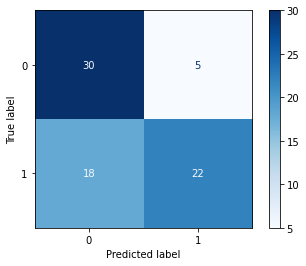

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)

###This is the 2nd best model which gave me 72.8 accuracy

In [ ]:
# on knn-imputation
from sklearn.ensemble import RandomForestClassifier
rfc11 = RandomForestClassifier(n_estimators=500, max_features= 'auto', max_depth=3, min_samples_leaf = 5, max_leaf_nodes = 3, min_samples_split = 10,bootstrap=True)
rfc11.fit(X_train1, y_train1)
print('Accuracy: ',round(accuracy_score(y_test1,  rfc11.predict(X_test1)), 3))
print('precision: ',round(precision_score(y_test1,  rfc11.predict(X_test1)), 3))
print('recall: ',round(recall_score(y_test1,  rfc11.predict(X_test1)), 3))
print('f1_score: ',round(f1_score(y_test1,  rfc11.predict(X_test1)), 3))

Accuracy:  0.733
precision:  0.812
recall:  0.65
f1_score:  0.722


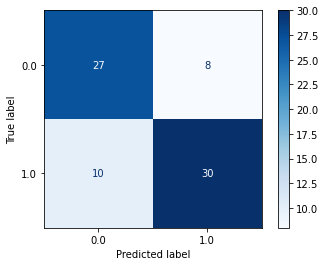

In [ ]:
plot_confusion_matrix(rfc11, X_test1, y_test1, cmap=plt.cm.Blues)

### m. At least one of the models used to compute should be your own implementation using NumPy.

In [ ]:
import math
from collections import Counter

In [ ]:
X_train.index=range(len(X_train))
y_train.index=range(len(y_train))
X_test.index=range(len(X_test))
y_test.index=range(len(y_test))

In [ ]:
# KNN numpy implemenation
def neighbors_distance(X_train,Y_train,X_test,K):
    distance=[]
    for i in range(len(X_train)):
        eDistance=0
        for j in range(len(X_train.columns)):   
                eDistance+=round(np.sqrt(pow((X_train.iloc[i,j]-X_test[j]),2)),2)
        distance.append((eDistance,i,Y_train.iloc[i]))
        distance=sorted(distance, key=lambda x: x[0])[0:K]
    return distance


def knn_predict(X_train,Y_train,X_test,K):
    neighbours=[]
    responses=[]
    for i in range(len(X_test)):
        neighbours.append(neighbors_distance(X_train,Y_train,X_test.iloc[i,:],K))
    for i in neighbours:
        majority={}
        for j in i:
            if j[-1] in majority.keys():
                majority[j[-1]]=majority[j[-1]]+1
            else:
                majority[j[-1]]=1
        responses.append(sorted(majority,key=majority.get,reverse=True)[0])
    return responses


def knn_predict_numeric(X_train,Y_train,X_test,K):
    neighbours=[]
    responses=[]
    for i in range(len(X_test)):
        neighbours.append(neighbors_distance(X_train,Y_train,X_test.iloc[i,:],K))
    for i in neighbours:
        mean=0
        for j in i:
            mean+=j[-1]
        mean=mean/K
        responses.append(mean)
    return responses

def accuracy_category(actual,predicted):
    correct=0
    for i in range(len(predicted)):
        if predicted[i]==actual[i]:
            correct+=1
    return round((correct/len(actual))*100,2)

def accuracy_numerical(actual,predicted):
    error=0
    for i in range(len(predicted)):
        error+=pow((actual[i]-predicted[i]),2)
    error=error/len(predicted)-1
    return 100-error

In [ ]:
output=knn_predict(X_train,y_train,X_test,20)
print('accuracy: ',accuracy_category(y_test,output))

accuracy:  64.0


### o. Use the cardio-validation.csv and cardio-train.csv as well to make your final prediction.

In [ ]:
validation_df = pd.read_csv('/content/drive/MyDrive/lab1_dataset/cardio-validation.csv')
validation_df['age'] =  validation_df['age'] / 365
validation_df = validation_df.drop('id', axis=1)
validation_df = validation_df.drop('height',axis=1)
le = LabelEncoder()
for feat in ['gender','cholesterol','gluc','smoke','alco','active']:
    validation_df[feat] = le.fit_transform(validation_df[feat].astype(str))


numerical_columns = ['age','ap_hi','ap_lo','weight']

knn_imputer = KNNImputer(n_neighbors = 4)
knn_imputer.fit(validation_df)
num_cols = [col for col in validation_df.columns if validation_df[col].dtypes != 'O']
validation_df = pd.DataFrame(knn_imputer.transform(validation_df),columns = num_cols)

validation_df['pulse pressure'] = validation_df['ap_hi'] - validation_df['ap_lo']
numerical_columns.append('pulse pressure')
validation_df[numerical_columns] = MinMaxScaler().fit_transform(validation_df[numerical_columns])
validation_df.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pulse pressure
0,0.494585,0.0,0.198020,0.289474,0.055556,2.0,3.0,0.0,0.0,1.0,1.0,0.935780
1,0.391813,2.0,0.186139,0.315789,0.064815,2.0,2.0,2.0,0.0,1.0,0.0,0.928899
2,0.701023,2.0,0.524752,0.421053,0.064815,1.0,2.0,0.0,0.0,2.0,1.0,0.938073
3,0.918562,1.0,0.262376,0.368421,0.074074,2.0,2.0,0.0,0.0,1.0,1.0,0.924312
4,0.412308,1.0,0.752475,0.289474,0.055556,1.0,3.0,2.0,2.0,1.0,1.0,0.935780


In [ ]:
# combining validation + train dataset into full_df
train_df_knns = X_train_knns
train_df_knns['cardio'] = train_df['cardio']
frames = [validation_df, train_df_knns]
full_df = pd.concat(frames)
full_df.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pulse pressure
0,0.494585,0.0,0.198020,0.289474,0.055556,2.0,3.0,0.0,0.0,1.0,1.0,0.935780
1,0.391813,2.0,0.186139,0.315789,0.064815,2.0,2.0,2.0,0.0,1.0,0.0,0.928899
2,0.701023,2.0,0.524752,0.421053,0.064815,1.0,2.0,0.0,0.0,2.0,1.0,0.938073
3,0.918562,1.0,0.262376,0.368421,0.074074,2.0,2.0,0.0,0.0,1.0,1.0,0.924312
4,0.412308,1.0,0.752475,0.289474,0.055556,1.0,3.0,2.0,2.0,1.0,1.0,0.935780


In [ ]:
# shape of full_df
full_df.shape

(1000, 12)

In [ ]:
from sklearn.model_selection import train_test_split

X_train12, X_test12, y_train12, y_test12 = train_test_split(X, y, test_size = 0.15, random_state=149)

In [ ]:
X_train12.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,pulse pressure
253,0.674467,0.0,0.524590,0.333333,0.303030,2.0,2.0,0.0,0.0,1.0,0.428571
98,0.480399,0.0,0.321782,0.315789,0.055556,3.0,2.0,0.0,0.0,2.0,0.938073
342,0.811999,0.0,0.326733,0.315789,0.046296,3.0,3.0,0.0,0.0,1.0,0.947248
121,0.713125,1.0,0.316832,0.315789,0.055556,1.0,2.0,0.0,0.0,1.0,0.938073
194,0.523237,0.0,0.377049,0.412500,0.303030,0.0,0.0,0.0,0.0,2.0,0.496429


###LOGISTIC REGRESSION

In [ ]:
# lasso logistic regression on knn_imputed dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, f1_score
log_reg1 = LogisticRegression(C = 10, penalty='l1', solver='liblinear')
log_reg1.fit(X_train1, y_train1)
print('Accuracy: ',round(accuracy_score(y_test12,  log_reg1.predict(X_test12)), 3))
print('precision: ',round(precision_score(y_test12,  log_reg1.predict(X_test12)), 3))
print('recall: ',round(recall_score(y_test12,  log_reg1.predict(X_test12)), 3))
print('f1_score: ',round(f1_score(y_test12,  log_reg1.predict(X_test12)), 3))

Accuracy:  0.673
precision:  0.818
recall:  0.536
f1_score:  0.647


###RANDOM FOREST

In [ ]:
# on knn_imputed dataset
from sklearn.ensemble import RandomForestClassifier
rfc11 = RandomForestClassifier(n_estimators=5000, max_features= 'auto', max_depth=20,min_samples_leaf = 20, min_samples_split = 15,bootstrap=True)
rfc11.fit(X_train12, y_train12)
print('Accuracy: ',round(accuracy_score(y_test12,  rfc11.predict(X_test12)), 3))
print('precision: ',round(precision_score(y_test12,  rfc11.predict(X_test12)), 3))
print('recall: ',round(recall_score(y_test12,  rfc11.predict(X_test12)), 3))
print('f1_score: ',round(f1_score(y_test12,  rfc11.predict(X_test12)), 3))

Accuracy:  0.72
precision:  0.769
recall:  0.714
f1_score:  0.741


In [ ]:
# on knn_imputed dataset
from sklearn.ensemble import RandomForestClassifier
rfc11 = RandomForestClassifier(n_estimators=20, max_features= 3, max_depth=3,bootstrap=True)
rfc11.fit(X, y)
print('Accuracy: ',round(accuracy_score(y,  rfc11.predict(X)), 3))
# print('precision: ',round(precision_score(y_test12,  rfc11.predict(X_test12)), 3))
# print('recall: ',round(recall_score(y_test12,  rfc11.predict(X_test12)), 3))
# print('f1_score: ',round(f1_score(y_test12,  rfc11.predict(X_test12)), 3))

Accuracy:  0.754


###SVM

In [ ]:
# on knn_imputed dataset
from sklearn.decomposition import PCA
from sklearn.svm import SVC
# pca = PCA(n_components = 10)
# pca.fit(X_train_knns)
# pca_knn = pca.transform(X_train_knns)
# X_trainp1, X_testp1, y_trainp1, y_testp1 = train_test_split(pca_knn, y, test_size = 0.15, random_state=2)
trail2_svm = SVC(kernel = 'linear',C = 2000, gamma = 0.001)
trail2_svm.fit(X_train12, y_train12)
# f1_score(y_testp1, trail2_svm.predict(X_testp))
print('Accuracy: ',round(accuracy_score(y_test12,  trail2_svm.predict(X_test12)), 3))
print('precision: ',round(precision_score(y_test12,  trail2_svm.predict(X_test12)), 3))
print('recall: ',round(recall_score(y_test12,  trail2_svm.predict(X_test12)), 3))
print('f1_score: ',round(f1_score(y_test12,  trail2_svm.predict(X_test12)), 3))

Accuracy:  0.653
precision:  0.69
recall:  0.69
f1_score:  0.69


# TEST

### n. Upload your test data predictions to Kaggle competition in the correct submission format.

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/lab1_dataset/cardio-test.csv')
test_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,47997,20222,Men,156,57.0,110,70,Normal,Normal,0,1,0
1,15311,18079,Men,160,60.0,120,80,Normal,Normal,0,0,1
2,44269,20279,Women,170,80.0,140,69,Normal,Normal,0,0,1
3,91373,23227,Men,158,80.0,160,90,High,Normal,0,0,1
4,9686,20461,Men,158,92.0,140,90,Normal,Above Normal,0,0,0


In [ ]:
test_id = test_df["id"]

In [ ]:
columns = ['weight', 'ap_lo', 'ap_hi']
for col in columns:
  Q1 = test_df[col].quantile(0.25)
  Q3 = test_df[col].quantile(0.75)
  IQR = Q3 - Q1    #IQR is interquartile range. 
  med = np.median(test_df[col])
  for i in test_df[col]:
    if (i <= Q1 - 1.5 * IQR) or (i >= Q3 + 1.5 *IQR):
      test_df[col] = test_df[col].replace(i, med)

In [ ]:
from sklearn.impute import KNNImputer

test_df['age'] =  test_df['age'] / 365
test_df = test_df.drop('id', axis=1)
test_df = test_df.drop('height',axis=1)
le = LabelEncoder()

for feature in ['gender','cholesterol','gluc']:
    test_df[feature].fillna(test_df[feature].mode()[0], inplace=True)

for feat in ['gender',"cholesterol",'gluc']:
    test_df[feat] = le.fit_transform(test_df[feat].astype(str))


In [ ]:
test_df

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,55.402740,0,57.0,110,70,2,2,0,1,0
1,49.531507,0,60.0,120,80,2,2,0,0,1
2,55.558904,1,80.0,140,69,2,2,0,0,1
3,63.635616,0,80.0,160,90,1,2,0,0,1
4,56.057534,0,92.0,140,90,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
245,54.167123,0,64.0,110,70,2,2,0,0,1
246,53.421918,0,80.0,150,90,1,2,0,0,1
247,51.369863,0,62.0,120,80,2,2,0,0,1
248,53.989041,0,95.0,130,80,2,2,0,0,1


In [ ]:
knn_imputer_test = KNNImputer(n_neighbors = 4)
knn_imputer_test.fit(test_df)
num_cols = [col for col in test_df.columns if test_df[col].dtypes != 'O']
test_df_knn = pd.DataFrame(knn_imputer_test.transform(test_df),columns = num_cols)
test_df_knn.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,55.402740,0.0,57.0,110.0,70.0,2.0,2.0,0.0,1.0,0.0
1,49.531507,0.0,60.0,120.0,80.0,2.0,2.0,0.0,0.0,1.0
2,55.558904,1.0,80.0,140.0,69.0,2.0,2.0,0.0,0.0,1.0
3,63.635616,0.0,80.0,160.0,90.0,1.0,2.0,0.0,0.0,1.0
4,56.057534,0.0,92.0,140.0,90.0,2.0,0.0,0.0,0.0,0.0


In [ ]:
test_df_knn['pulse pressure'] = test_df_knn['ap_hi'] - test_df_knn['ap_lo']

In [ ]:
numerical_columns = ['age','ap_hi','ap_lo','weight','pulse pressure', 'height']
X_test_knns = test_df_knn
#y_test_knns = test_df_knn['cardio']
numerical_columns = ['age','ap_hi','ap_lo','weight','pulse pressure']
test_df_knn[numerical_columns] = MinMaxScaler().fit_transform(test_df_knn[numerical_columns])

In [ ]:
test_df_knn

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,pulse pressure
0,0.644653,0.0,0.200000,0.166667,0.032258,2.0,2.0,0.0,1.0,0.0,0.354839
1,0.410343,0.0,0.250000,0.333333,0.354839,2.0,2.0,0.0,0.0,1.0,0.354839
2,0.650886,1.0,0.583333,0.666667,0.000000,2.0,2.0,0.0,0.0,1.0,0.854839
3,0.973212,0.0,0.583333,1.000000,0.677419,1.0,2.0,0.0,0.0,1.0,0.838710
4,0.670785,0.0,0.783333,0.666667,0.677419,2.0,0.0,0.0,0.0,0.0,0.516129
...,...,...,...,...,...,...,...,...,...,...,...
245,0.595342,0.0,0.316667,0.166667,0.032258,2.0,2.0,0.0,0.0,1.0,0.354839
246,0.565602,0.0,0.583333,0.833333,0.677419,1.0,2.0,0.0,0.0,1.0,0.677419
247,0.483709,0.0,0.283333,0.333333,0.354839,2.0,2.0,0.0,0.0,1.0,0.354839
248,0.588235,0.0,0.833333,0.500000,0.354839,2.0,2.0,0.0,0.0,1.0,0.516129


In [ ]:
cardio_arr = rfc11.predict(X_test_knns)
cardio_arr = cardio_arr.astype(int)
cardio_df = pd.DataFrame(cardio_arr, columns = ['cardio'])
cardio_df.head()

,cardio
0,0
1,0
2,1
3,1
4,1


In [ ]:
testid_df = test_id.to_frame()
testid_df

,id
0,47997
1,15311
2,44269
3,91373
4,9686
...,...
245,46137
246,58058
247,30608
248,83845


In [ ]:
submission = pd.concat([testid_df, cardio_df], axis=1)

In [ ]:
submission.to_csv('submission.csv',index=False)

In [ ]:
submission

,id,cardio
0,47997,0
1,15311,0
2,44269,1
3,91373,1
4,9686,1
...,...,...
245,46137,0
246,58058,1
247,30608,0
248,83845,1


## Task 2


## 1. Split the dataset in train and test samples


In [ ]:
complete_df = pd.read_csv('/content/drive/MyDrive/lab1_dataset/cardio-complete.csv',delimiter=',')

le = LabelEncoder()
cat_feat = ['gender','cholesterol','gluc']
for feature in cat_feat:
    complete_df[feature] = pd.DataFrame(le.fit_transform(complete_df[feature]))
    
X_trainf, X_testf, y_trainf, y_testf = train_test_split(complete_df.drop('cardio',axis=1), complete_df['cardio'], test_size=0.15)

In [ ]:
X_trainf.shape

(850, 12)

## 2. Applying the regression model that you think is most suited for this problem.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, f1_score

log_reg_ = LogisticRegression(C = 10, penalty='l1', solver='liblinear')
log_reg_.fit(X_trainf, y_trainf)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## 3. Compare your prediction result with the first technique. Comparison technique

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        71
           1       0.76      0.81      0.79        79

    accuracy                           0.77       150
   macro avg       0.77      0.76      0.76       150
weighted avg       0.77      0.77      0.77       150



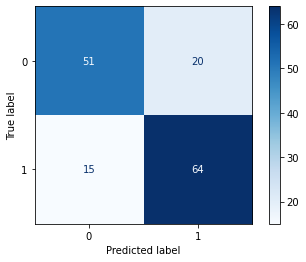

In [ ]:
# Task 2 result
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
print(classification_report(y_testf, log_reg_.predict(X_testf)))

plot_confusion_matrix(log_reg_, X_testf, y_testf, cmap=plt.cm.Blues)

              precision    recall  f1-score   support

           0       0.55      0.74      0.63        69
           1       0.68      0.48      0.57        81

    accuracy                           0.60       150
   macro avg       0.62      0.61      0.60       150
weighted avg       0.62      0.60      0.59       150



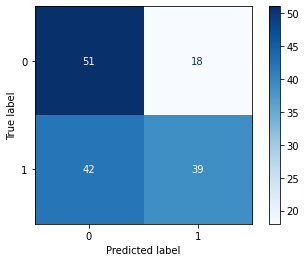

In [ ]:
# Task 1 result

dt_t2 = DecisionTreeClassifier(max_depth=3, max_features = 4)
dt_t2.fit(X_trainf, y_trainf)

print(classification_report(y_testf, dt_t2.predict(X_testf)))
plot_confusion_matrix(dt_t2, X_testf, y_testf, cmap=plt.cm.Blues)

In [ ]:
# Logistic Regression performed better with f1-score-72 and accuracy of 77%

# Task 3

## 1. Apply feature transform on the features used in task 1


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_po = full_df.drop('cardio',axis=1)
X_new = poly.fit_transform(X_po)
y = full_df['cardio']
X_trainy, X_testy, y_trainy, y_testy = train_test_split(X_new, y, test_size=0.15)

### a. Does varying the polynomial degree change your accuracy?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, f1_score

log_reg_ = LogisticRegression(C = 10, penalty='l1', solver='liblinear')
log_reg_.fit(X_trainy, y_trainy)
print('F1 score: ', f1_score(y_testy, log_reg_.predict(X_testy)))

F1 score:  0.7080745341614907


#### Using polynomial of degree 2 decreased the f1 score

### b. Can you identify if your model is underfitting or overfitting? (Hint use cross-validation error and in-sample error plot to identify high bias and high variance.) Plot the relationships.

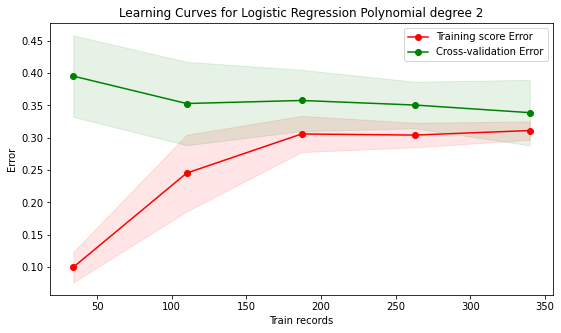

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(figsize=(9, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Train records")
    axes.set_ylabel("Error")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,return_times=True)
    for i in range(len(train_scores)):
        train_scores[i] = 1-train_scores[i]
    for i in range(len(test_scores)):
        test_scores[i] = 1-test_scores[i]
 
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score Error")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation Error")
    axes.legend(loc="best")

    return plt

title = "Learning Curves for Logistic Regression Polynomial degree 2"
log_reg_ = LogisticRegression(C = 10, penalty='l1', solver='liblinear')
plot_learning_curve(log_reg_, title, X_train, y_train, n_jobs=-1)
plt.show()

In [ ]:
# The Error is getting Constant with while the model is getting trained. The model is good it is not underfitting or overfitting.